## News Mood
'''
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
'''



In [61]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [62]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [63]:
# Target Search newa channel
target_user = ("@BBC","@CNN","@nytimes","@FoxNews", "CBSNews")

# Lists to hold results
compound_list = []
negi = []
posi = []
neut = []
users = []
numbers = []
dates = []
oldest_tweet = None

In [64]:
for user in target_user:
   # Retrieve 100 most recent tweets -- specifying a max_id
    public_tweets = api.user_timeline(user, count=100, 
                               result_type="recent", max_id=oldest_tweet)
    counter = 1

    # Loop through all tweets
    for tweet in public_tweets:
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])

        # Add each value to the appropriate array and reduce counter
        compound_list.append(results["compound"])
        negi.append(results["neg"])
        posi.append(results["pos"])
        neut.append(results["neu"])
        users.append(user)
        dates.append(tweet["created_at"])
        numbers.append(counter)
        counter +=1
news_df = pd.DataFrame({"Channel":users, "Date":dates,"Compound":compound_list,"Negative":negi, 
                        "Positive":posi,"Neutral":neut, "Tweet_Ago": numbers})

In [65]:
#Check the result
news_df.head()

,Channel,Compound,Date,Negative,Neutral,Positive,Tweet_Ago
0,@BBC,0.0000,Fri Mar 09 19:03:04 +0000 2018,0.0,1.000,0.000,1
1,@BBC,0.5719,Fri Mar 09 18:00:10 +0000 2018,0.0,0.764,0.236,2
2,@BBC,0.0000,Fri Mar 09 17:18:55 +0000 2018,0.0,1.000,0.000,3
3,@BBC,0.4939,Fri Mar 09 17:00:10 +0000 2018,0.0,0.656,0.344,4
4,@BBC,0.3818,Fri Mar 09 16:56:32 +0000 2018,0.0,0.874,0.126,5


In [66]:
news_df.to_csv("News_Tweets.csv")

In [67]:
#check number of tweets
len(users)

500

In [68]:
type(news_df)

pandas.core.frame.DataFrame

In [69]:
#group the result using pivot_table function
pivot_df = news_df.pivot_table(index=["Tweet_Ago"], columns=["Channel"], values=["Compound"])
pivot_df

Compound                                  
Channel       @BBC    @CNN @FoxNews @nytimes CBSNews
Tweet_Ago                                           
1           0.0000 -0.5267   0.7269   0.4404 -0.7650
2           0.5719  0.7269   0.0000  -0.6486 -0.8555
3           0.0000  0.3612  -0.2023  -0.6463 -0.3400
4           0.4939  0.0000  -0.6486   0.0000 -0.2960
5           0.3818 -0.0258   0.0000  -0.1779 -0.2960
6           0.5848  0.5423  -0.3400   0.6369  0.0000
7           0.0000  0.0000   0.4939   0.7506 -0.5423
8           0.0000  0.0000  -0.2755  -0.4215 -0.6486
9           0.4939  0.0000  -0.5606  -0.4939 -0.2263
10         -0.4404 -0.6486   0.4404   0.5574  0.2960
11          0.7783  0.0000   0.0258   0.0000 -0.7269
12          0.0000 -0.5423   0.0000   0.0000 -0.2960
13          0.0000  0.0000   0.0000   0.0000  0.7579
14          0.5719  0.4215   0.0000   0.0000  0.0000
15          0.6114 -0.7269   0.7003   0.0772  0.0000
16          0.5859 -0.3400  -0.4939   0.1139  0.0000
17          0.0000  0.0000  -0.9300   0.0000 -0.5267
18          0.0000  0.0000  -0.6124   0.4754 -0.7650
19          0.4389 -0.4552   0.0000   0.7096  0.0000
20          0.0000  0.2023  -0.2960   0.0000  0.0000
21          0.4404 -0.1027  -0.4404   0.4404 -0.4939
22          0.0000 -0.2960   0.3818  -0.0258 -0.5574
23          0.4019  0.7269   0.0516   0.0000  0.0000
24          0.0000 -0.2960   0.0000   0.0000  0.0000
25          0.0000  0.1280  -0.6222  -0.8603  0.5106
26         -0.1027 -0.4404   0.1027  -0.1531  0.6801
27          0.0000 -0.3400   0.1027   0.0000  0.0000
28          0.5719 -0.5994   0.0000  -0.6808  0.4404
29          0.5803  0.5106   0.0000   0.0000  0.7269
30          0.0000 -0.5574   0.0000  -0.1531  0.7506
...            ...     ...      ...      ...     ...
71          0.4215  0.3612  -0.9042   0.0000  0.0000
72         -0.6808  0.3818  -0.8271   0.4047  0.0000
73          0.4215  0.4588  -0.5106   0.5719  0.0000
74         -0.8591  0.2263  -0.3400   0.0000 -0.2960
75          0.5994 -0.2263  -0.5574   0.0000  0.8126
76          0.0000 -0.3400  -0.9100   0.3400  0.0000
77         -0.4215 -0.5423  -0.2960  -0.2748  0.0000
78          0.4939  0.0000   0.0000   0.1280  0.0000
79         -0.1027  0.0000   0.0000   0.0000  0.6124
80          0.0000  0.4549   0.4927   0.0000  0.2023
81          0.3182  0.2023  -0.5574  -0.7351 -0.2263
82         -0.0644  0.0000  -0.2023   0.0000 -0.8402
83          0.6997 -0.4404  -0.2023   0.4019  0.4215
84          0.8439  0.1027   0.3612   0.3400 -0.5719
85          0.7269  0.0000   0.0000  -0.7650  0.3182
86          0.6246  0.1027   0.4215  -0.2023  0.3818
87          0.0000 -0.3400   0.0000   0.2732  0.0000
88          0.4404  0.0000   0.7146   0.0000  0.3612
89          0.5994 -0.4404   0.7269  -0.6486  0.0258
90          0.7901  0.3400   0.0936   0.0000 -0.6486
91          0.4215  0.0000   0.0000   0.0000  0.0000
92         -0.2732 -0.4767  -0.8271   0.0000  0.5106
93          0.5023 -0.2960  -0.5267   0.2263  0.0000
94          0.0000  0.0000   0.0000   0.0000 -0.8402
95         -0.8555 -0.8074   0.7269   0.7351 -0.4767
96          0.6124  0.0000   0.0000   0.5574  0.0000
97          0.4472  0.4549   0.4588   0.0000 -0.0424
98          0.1531  0.2960   0.7650   0.0000 -0.2732
99          0.0000  0.0000   0.0000   0.4215 -0.3182
100        -0.1779  0.7096  -0.3818   0.0000  0.0000

[100 rows x 5 columns]

In [70]:
type(pivot_df)

pandas.core.frame.DataFrame

In [71]:
#Check column names for scatter plot
pivot_df.columns

MultiIndex(levels=[['Compound'], ['@BBC', '@CNN', '@FoxNews', '@nytimes', 'CBSNews']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'Channel'])

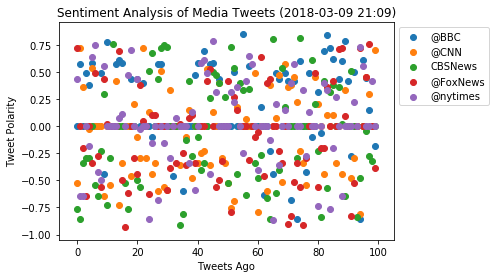

In [72]:
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Media Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plot News channels
plt.scatter(np.arange(100),pivot_df['Compound']["@BBC"])
plt.scatter(np.arange(100),pivot_df['Compound']["@CNN"])
plt.scatter(np.arange(100),pivot_df['Compound']["CBSNews"])
plt.scatter(np.arange(100),pivot_df['Compound']["@FoxNews"])
plt.scatter(np.arange(100),pivot_df['Compound']["@nytimes"])
plt.legend(loc='best',bbox_to_anchor=(1,1))
#Save Plot
plt.savefig("TweetPy.png")
plt.show()

In [73]:
group_df = news_df.groupby(["Channel"])[["Compound"]].mean()

In [74]:
group_df

,Compound
Channel,
@BBC,0.171544
@CNN,-0.055181
@FoxNews,-0.071107
@nytimes,0.039502
CBSNews,-0.052768


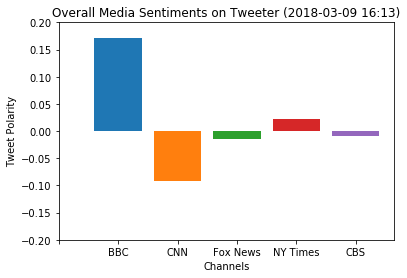

In [37]:
# # Incorporate the other graph properties
plt.bar(1,group_df['Compound']["@BBC"])
plt.bar(2,group_df['Compound']["@CNN"])
plt.bar(3,group_df['Compound']["@FoxNews"])
plt.bar(4,group_df['Compound']["@nytimes"])
plt.bar(5,group_df['Compound']["CBSNews"])
plt.title("Overall Media Sentiments on Tweeter ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Channels")
plt.ylim(-.2,.2)
plt.xticks(np.arange(6), (" ",'BBC','CNN','Fox News','NY Times','CBS'))
#Save Plot
plt.savefig("Media_TweetPy.png")
plt.show()